In [77]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [78]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [79]:
df = pd.read_csv('dataset_processed_v2.csv')
df_seat_lagged=pd.read_csv("seat_level_lagged_isattended.csv")
df_sectionwise_attend=pd.read_csv('sectionwise_attend.csv')


In [80]:
df_sectionwise_attend.weightage.replace({0.0:0.75,0.01:0.75},inplace=True)

<AxesSubplot:xlabel='weightage', ylabel='Count'>

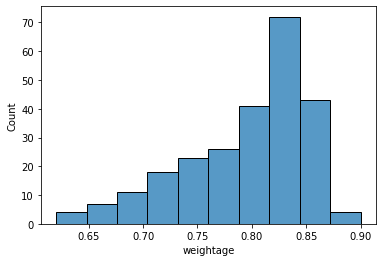

In [81]:
sns.histplot(df_sectionwise_attend.weightage)

In [22]:
df.head()

,UniqueID,SeatUniqueID,event_date,isAttended,event_name,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,price_bins,week_of_year,dayofweek,Opponent,big_rivals
0,CLT21HOU-101-10-1,101-10-1,2021-10-17,Yes,CLT21HOU,F,111.0,Y,SOLD,0,GA,Manifest,NaN,2021,25.0,NaN,NaN,0.0,Season,200.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,41,6,HOU,1
1,CLT21HOU-101-10-10,101-10-10,2021-10-17,No,CLT21HOU,F,111.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,200.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,41,6,HOU,1
2,CLT21HOU-101-10-11,101-10-11,2021-10-17,No,CLT21HOU,F,111.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,200.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,41,6,HOU,1
3,CLT21HOU-101-10-12,101-10-12,2021-10-17,Yes,CLT21HOU,F,111.0,Y,SOLD,0,GA,Manifest,NaN,2021,4.0,NaN,NaN,0.0,Season,200.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,41,6,HOU,1
4,CLT21HOU-101-10-13,101-10-13,2021-10-17,No,CLT21HOU,F,111.0,Y,SOLD,0,GA,Manifest,NaN,2021,32.0,NaN,NaN,0.0,Season,200.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,41,6,HOU,1


In [82]:
df_seat_lagged.sample(10)

,event_date,SeatUniqueID,isAttended_lagg_1,isAttended_lagg_2,isAttended_lagg_3
1032131,2022-11-20,105-26-29,1.0,1.0,1.0
304516,2021-10-31,606-15N-11,1.0,1.0,1.0
917517,2022-10-16,152-13-17,1.0,1.0,0.0
524137,2021-12-18,127-19-7,1.0,1.0,1.0
299030,2021-10-31,451-22N-18,0.0,0.0,1.0
809928,2022-09-25,433-12-5,0.0,1.0,NaN
354699,2021-11-04,407-15-22,0.0,1.0,0.0
1054322,2022-11-20,237-13-26,1.0,1.0,0.0
648956,2022-08-20,114-1-3,NaN,1.0,1.0
218796,2021-10-17,242-5-3,1.0,1.0,1.0


In [83]:
df['event_date']=pd.to_datetime(df['event_date'])
df_seat_lagged['event_date']=pd.to_datetime(df_seat_lagged['event_date'])
#df_seat_flag_added['event_date']=pd.to_datetime(df_seat_flag_added['event_date'])
df['week_of_year']=df['event_date'].dt.weekofyear
df['dayofweek']=df['event_date'].dt.dayofweek
df['Opponent']=df.event_name.str.slice(5,len(df.event_name),1)
df['big_rivals']=np.where((df['Opponent']=='HOU')|(df['Opponent']=='NE')|(df['Opponent']=='PIT'),1,0)

C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\4268737663.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year']=df['event_date'].dt.weekofyear


In [84]:
df_merge=pd.merge(df,df_seat_lagged,on=['event_date','SeatUniqueID'])

In [85]:
df_merge[df_merge.isAttended=='???']

,UniqueID,SeatUniqueID,event_date,isAttended,event_name,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,price_bins,week_of_year,dayofweek,Opponent,big_rivals,isAttended_lagg_1,isAttended_lagg_2,isAttended_lagg_3
193038,CLT21LV-101-10-1,101-10-1,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,25.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0
193039,CLT21LV-101-10-10,101-10-10,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0
193040,CLT21LV-101-10-11,101-10-11,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0
193041,CLT21LV-101-10-12,101-10-12,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,4.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,0.0
193042,CLT21LV-101-10-13,101-10-13,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,32.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707797,CLT22HOU-646-9-5,646-9-5,2023-01-08,???,CLT22HOU,R,48.0,Y,SOLD,0,GA,Manifest,NaN,2022,0.0,Yes,21.0,1.0,Season,195.0,15.0,180.0,22FS,Not Comp,ACCOUNT MANAGER,New,A,1,6,HOU,1,1.0,1.0,1.0
707798,CLT22HOU-646-9-6,646-9-6,2023-01-08,???,CLT22HOU,R,48.0,Y,SOLD,0,GA,Manifest,NaN,2022,0.0,Yes,21.0,1.0,Season,195.0,15.0,180.0,22FS,Not Comp,ACCOUNT MANAGER,New,A,1,6,HOU,1,1.0,1.0,1.0
707799,CLT22HOU-646-9-7,646-9-7,2023-01-08,???,CLT22HOU,R,48.0,N,SOLD,0,GA,Manifest,NaN,2022,8.0,NaN,NaN,0.0,Sponsor,222.0,NaN,NaN,OTHERS,Not Comp,JIM IRSAY,Sponsor,A,1,6,HOU,1,1.0,0.0,1.0
707800,CLT22HOU-646-9-8,646-9-8,2023-01-08,???,CLT22HOU,R,48.0,N,SOLD,0,GA,Manifest,NaN,2022,8.0,NaN,NaN,0.0,Sponsor,222.0,NaN,NaN,OTHERS,Not Comp,JIM IRSAY,Sponsor,A,1,6,HOU,1,0.0,1.0,1.0


In [54]:
df_merge[df_merge.isAttended=='???']

,UniqueID,SeatUniqueID,event_date,isAttended,event_name,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,price_bins,week_of_year,dayofweek,Opponent,big_rivals,isAttended_lagg_1,isAttended_lagg_2,isAttended_lagg_3,section_number,section_name_x,1_x,0_x,total_x,weightage_x,section_name_y,1_y,0_y,total_y,weightage_y
193038,CLT21LV-101-10-1,101-10-1,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,25.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0,101,101,3623,10957,14580,0.75,101,3623,10957,14580,0.75
193039,CLT21LV-101-10-10,101-10-10,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0,101,101,3623,10957,14580,0.75,101,3623,10957,14580,0.75
193040,CLT21LV-101-10-11,101-10-11,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0,101,101,3623,10957,14580,0.75,101,3623,10957,14580,0.75
193041,CLT21LV-101-10-12,101-10-12,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,4.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,0.0,101,101,3623,10957,14580,0.75,101,3623,10957,14580,0.75
193042,CLT21LV-101-10-13,101-10-13,2022-01-02,???,CLT21LV,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,32.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,52,6,LV,0,1.0,1.0,1.0,101,101,3623,10957,14580,0.75,101,3623,10957,14580,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707797,CLT22HOU-646-9-5,646-9-5,2023-01-08,???,CLT22HOU,R,48.0,Y,SOLD,0,GA,Manifest,NaN,2022,0.0,Yes,21.0,1.0,Season,195.0,15.0,180.0,22FS,Not Comp,ACCOUNT MANAGER,New,A,1,6,HOU,1,1.0,1.0,1.0,646,646,1728,3870,5598,0.69,646,1728,3870,5598,0.69
707798,CLT22HOU-646-9-6,646-9-6,2023-01-08,???,CLT22HOU,R,48.0,Y,SOLD,0,GA,Manifest,NaN,2022,0.0,Yes,21.0,1.0,Season,195.0,15.0,180.0,22FS,Not Comp,ACCOUNT MANAGER,New,A,1,6,HOU,1,1.0,1.0,1.0,646,646,1728,3870,5598,0.69,646,1728,3870,5598,0.69
707799,CLT22HOU-646-9-7,646-9-7,2023-01-08,???,CLT22HOU,R,48.0,N,SOLD,0,GA,Manifest,NaN,2022,8.0,NaN,NaN,0.0,Sponsor,222.0,NaN,NaN,OTHERS,Not Comp,JIM IRSAY,Sponsor,A,1,6,HOU,1,1.0,0.0,1.0,646,646,1728,3870,5598,0.69,646,1728,3870,5598,0.69
707800,CLT22HOU-646-9-8,646-9-8,2023-01-08,???,CLT22HOU,R,48.0,N,SOLD,0,GA,Manifest,NaN,2022,8.0,NaN,NaN,0.0,Sponsor,222.0,NaN,NaN,OTHERS,Not Comp,JIM IRSAY,Sponsor,A,1,6,HOU,1,0.0,1.0,1.0,646,646,1728,3870,5598,0.69,646,1728,3870,5598,0.69


In [87]:
df_merge=df_merge[['UniqueID','isAttended','PC1', 'Price', 'paid', 'status', 'isHost', 'SeatType', 'TicketClass', 'Term', 'Season', 'Tenure', 'Resold', 'ResalePrice', 'isSTM', 'acct_type_desc_processed', 'event_sale_date_diff', 'event_resale_date_diff', 'sale_resale_date_diff', 'plan_event_name_processed', 'comp_name_processed', 'class_name_processed', 'TicketType_processed', 'price_bins', 'isAttended_lagg_1', 'isAttended_lagg_2', 'isAttended_lagg_3','week_of_year','dayofweek','big_rivals']]

In [ ]:
df_merge[df_merge.isAttended=='???']

# Separate Train-Test

In [ ]:
df_merge.sample(50)

In [ ]:
df

In [88]:
train_df = df_merge[df_merge['isAttended'] != '???']
test_df = df_merge[df['isAttended']=='???']

In [89]:
test_df

,UniqueID,isAttended,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,price_bins,isAttended_lagg_1,isAttended_lagg_2,isAttended_lagg_3,week_of_year,dayofweek,big_rivals
193038,CLT21LV-101-10-1,???,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,25.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,1.0,1.0,1.0,52,6,0
193039,CLT21LV-101-10-10,???,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,1.0,1.0,1.0,52,6,0
193040,CLT21LV-101-10-11,???,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,20.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,1.0,1.0,1.0,52,6,0
193041,CLT21LV-101-10-12,???,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,4.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,1.0,1.0,0.0,52,6,0
193042,CLT21LV-101-10-13,???,F,135.0,Y,SOLD,0,GA,Manifest,NaN,2021,32.0,NaN,NaN,0.0,Season,277.0,NaN,NaN,21FS,Not Comp,OPEN,Renewal,B,1.0,1.0,1.0,52,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707797,CLT22HOU-646-9-5,???,R,48.0,Y,SOLD,0,GA,Manifest,NaN,2022,0.0,Yes,21.0,1.0,Season,195.0,15.0,180.0,22FS,Not Comp,ACCOUNT MANAGER,New,A,1.0,1.0,1.0,1,6,1
707798,CLT22HOU-646-9-6,???,R,48.0,Y,SOLD,0,GA,Manifest,NaN,2022,0.0,Yes,21.0,1.0,Season,195.0,15.0,180.0,22FS,Not Comp,ACCOUNT MANAGER,New,A,1.0,1.0,1.0,1,6,1
707799,CLT22HOU-646-9-7,???,R,48.0,N,SOLD,0,GA,Manifest,NaN,2022,8.0,NaN,NaN,0.0,Sponsor,222.0,NaN,NaN,OTHERS,Not Comp,JIM IRSAY,Sponsor,A,1.0,0.0,1.0,1,6,1
707800,CLT22HOU-646-9-8,???,R,48.0,N,SOLD,0,GA,Manifest,NaN,2022,8.0,NaN,NaN,0.0,Sponsor,222.0,NaN,NaN,OTHERS,Not Comp,JIM IRSAY,Sponsor,A,0.0,1.0,1.0,1,6,1


# Label Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
test_df.set_index('UniqueID',inplace=True)

In [92]:
categorical_columns = [ 'PC1', 'paid', 'status', 'SeatType', 'TicketClass', 'Resold',
                       'acct_type_desc_processed', 'plan_event_name_processed', 'comp_name_processed','price_bins',
                       'class_name_processed', 'TicketType_processed', 'Season']

label_encoder_objects = dict()
for col in categorical_columns:
    ob = LabelEncoder()
    ob.fit(train_df[col])
    train_df[col] = ob.transform(train_df[col])
    test_df[col]=ob.transform(test_df[col],)
    label_encoder_objects[col] = ob

C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\3703994637.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = ob.transform(train_df[col])
C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\3703994637.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col]=ob.transform(test_df[col],)


In [93]:
label_encoder_objects

{'PC1': LabelEncoder(),
 'paid': LabelEncoder(),
 'status': LabelEncoder(),
 'SeatType': LabelEncoder(),
 'TicketClass': LabelEncoder(),
 'Resold': LabelEncoder(),
 'acct_type_desc_processed': LabelEncoder(),
 'plan_event_name_processed': LabelEncoder(),
 'comp_name_processed': LabelEncoder(),
 'price_bins': LabelEncoder(),
 'class_name_processed': LabelEncoder(),
 'TicketType_processed': LabelEncoder(),
 'Season': LabelEncoder()}

In [94]:
train_df['isAttended'] = train_df['isAttended'].replace({'Yes': 1, 'No': 0})

C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\3017425441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['isAttended'] = train_df['isAttended'].replace({'Yes': 1, 'No': 0})


In [95]:
X_train.head()

,SeatUniqueID,event_date,event_name,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,price_bins,week_of_year,dayofweek,Opponent,big_rivals,isAttended_lagg_1,isAttended_lagg_2,isAttended_lagg_3,section_number,section_name_x,1_x,0_x,total_x,weightage_x,section_name_y,1_y,0_y,total_y,weightage_y
590416,136-22-6,2021-10-31,CLT21TEN,6,178.0,2,3,0,1,2,3.49707,0,8.0,1,213.92971,0.0,6,214.0,32.283991,184.573547,0,0,7,6,1,43,6,TEN,0,1.0,1.0,1.0,136,136,2064,8952,11016,0.81,136,2064,8952,11016,0.81
635297,627-5-12,2021-10-31,CLT21TEN,24,53.0,2,3,0,1,2,3.49707,0,1.0,1,213.92971,0.0,6,213.0,32.283991,184.573547,0,0,1,4,0,43,6,TEN,0,1.0,0.0,1.0,627,627,2811,8817,11628,0.76,627,2811,8817,11628,0.76
424891,437-4-9,2021-08-15,CLT21PRE,8,74.0,2,3,0,1,2,3.49707,0,10.0,1,213.92971,0.0,6,137.0,32.283991,184.573547,0,0,7,6,0,32,6,PRE,0,NaN,NaN,NaN,437,437,610,2774,3384,0.82,437,610,2774,3384,0.82
412300,244-2-11,2021-08-15,CLT21PRE,7,77.0,2,3,0,1,2,3.49707,0,38.0,1,213.92971,0.0,6,137.0,32.283991,184.573547,0,0,7,6,0,32,6,PRE,0,NaN,NaN,NaN,244,244,711,4167,4878,0.85,244,711,4167,4878,0.85
1148967,626-11-9,2022-08-27,CLT22PR2,22,25.0,2,3,0,1,2,3.49707,1,1.0,1,213.92971,0.0,5,31.0,32.283991,184.573547,3,0,8,3,0,34,5,PR2,0,0.0,NaN,1.0,626,626,2888,8416,11304,0.74,626,2888,8416,11304,0.74


# Modelling

## Train-Test Split 

In [64]:
from sklearn.model_selection import train_test_split

In [96]:
X = train_df.drop(columns=['UniqueID', 'isAttended']).copy()
y = train_df[['isAttended']].copy()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=45)

In [98]:
Tenure_mean=X_train.Tenure.mean()
term_mean=X_train.Term.mean()
Resale_price_mean=X_train.ResalePrice.mean()
event_sale_date_diff_mean=X_train.event_sale_date_diff.mean()
event_resale_date_diff_mean=X_train.event_resale_date_diff.mean()
sale_resale_date_diff_mean=X_train.sale_resale_date_diff.mean()

In [99]:
X_train.Term.fillna(term_mean,inplace=True)
X_train.Tenure.fillna(Tenure_mean,inplace=True)
X_train.ResalePrice.fillna(Resale_price_mean,inplace=True)
X_train.event_sale_date_diff.fillna(event_sale_date_diff_mean,inplace=True)
X_train.event_resale_date_diff.fillna(event_resale_date_diff_mean,inplace=True)
X_train.sale_resale_date_diff.fillna(sale_resale_date_diff_mean,inplace=True)

In [100]:
X_test.Term.fillna(term_mean,inplace=True)
X_test.Tenure.fillna(Tenure_mean,inplace=True)
X_test.ResalePrice.fillna(Resale_price_mean,inplace=True)
X_test.event_sale_date_diff.fillna(event_sale_date_diff_mean,inplace=True)
X_test.event_resale_date_diff.fillna(event_resale_date_diff_mean,inplace=True)
X_test.sale_resale_date_diff.fillna(sale_resale_date_diff_mean,inplace=True)

In [101]:
test_df.Term.fillna(term_mean,inplace=True)
test_df.Tenure.fillna(Tenure_mean,inplace=True)
test_df.ResalePrice.fillna(Resale_price_mean,inplace=True)
test_df.event_sale_date_diff.fillna(event_sale_date_diff_mean,inplace=True)
test_df.event_resale_date_diff.fillna(event_resale_date_diff_mean,inplace=True)
test_df.sale_resale_date_diff.fillna(sale_resale_date_diff_mean,inplace=True)

C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\2357258576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.Term.fillna(term_mean,inplace=True)
C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\2357258576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.Tenure.fillna(Tenure_mean,inplace=True)
C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\2357258576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.

In [102]:
X_train.corr()

,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,price_bins,isAttended_lagg_1,isAttended_lagg_2,isAttended_lagg_3,week_of_year,dayofweek,big_rivals
PC1,1.000000,-0.768237,0.160484,-0.309511,1.284652e-01,5.720090e-01,0.191888,2.587635e-03,-0.052082,-0.315196,-6.560690e-02,-5.801837e-02,-0.091143,0.351359,-0.319888,-3.952095e-03,-1.023459e-01,0.399252,0.314391,-0.095837,-0.016776,-0.749130,-0.190005,-0.194169,-0.189498,0.000473,0.015172,0.007466
Price,-0.768237,1.000000,-0.066452,0.284726,-7.589200e-03,-7.468056e-01,-0.081966,-3.358759e-02,0.010163,0.235093,4.048495e-02,8.269377e-02,-0.051066,-0.438881,0.312001,1.203079e-02,7.555420e-02,-0.250031,-0.262594,0.063469,-0.002239,0.946274,0.119080,0.065394,0.088118,0.177667,-0.027967,0.042168
paid,0.160484,-0.066452,1.000000,-0.414272,4.367442e-01,6.673076e-02,0.170482,3.232242e-02,-0.069702,-0.074693,3.981117e-02,-6.090755e-03,-0.043446,0.075258,0.005533,8.982526e-03,3.194530e-03,0.375148,0.436133,-0.218489,-0.055414,-0.067109,-0.138086,-0.135518,-0.133727,0.034994,0.005445,0.014360
status,-0.309511,0.284726,-0.414272,1.000000,8.188780e-02,-1.052993e-01,-0.314740,-1.379994e-03,0.090296,0.050136,-1.188973e-01,1.856085e-03,0.218237,-0.241135,0.153788,1.813328e-03,5.635563e-03,-0.478394,-0.993426,-0.020957,-0.058924,0.220037,0.344763,0.289230,0.273279,0.072795,-0.031779,0.006912
isHost,0.128465,-0.007589,0.436744,0.081888,1.000000e+00,6.417447e-02,-0.140728,-1.339523e-17,-0.051963,-0.187713,7.771281e-02,7.445891e-03,-0.156057,0.061152,-0.327914,2.822749e-03,-1.501850e-02,0.418659,-0.079505,-0.308530,0.293812,-0.016796,-0.026738,-0.054046,-0.061408,0.076848,-0.006540,0.014813
SeatType,0.572009,-0.746806,0.066731,-0.105299,6.417447e-02,1.000000e+00,0.001435,-1.790007e-17,0.000261,-0.139570,-4.891281e-02,-4.245297e-02,0.205449,0.675058,-0.132608,1.432232e-02,-3.091541e-02,0.161132,0.101704,-0.090508,0.229045,-0.714307,-0.035919,-0.037520,-0.035639,-0.000413,0.000490,-0.000502
TicketClass,0.191888,-0.081966,0.170482,-0.314740,-1.407282e-01,1.435092e-03,1.000000,5.711759e-03,0.001540,0.035757,-2.288421e-03,-4.651299e-04,-0.027531,0.098101,0.069698,2.979584e-03,3.586554e-03,0.039596,0.331808,0.150807,-0.024020,-0.063878,-0.174325,-0.170749,-0.169459,0.000819,-0.000189,0.000576
Term,0.002588,-0.033588,0.032322,-0.001380,-1.339523e-17,-1.790007e-17,0.005712,1.000000e+00,-0.113731,0.033528,8.118721e-04,1.832119e-04,-0.004087,-0.019051,0.003668,-9.642447e-06,-3.817344e-03,-0.051394,0.001089,0.033752,-0.082273,-0.028575,-0.004722,-0.007966,-0.010189,0.000513,0.033672,0.016739
Season,-0.052082,0.010163,-0.069702,0.090296,-5.196287e-02,2.606750e-04,0.001540,-1.137312e-01,1.000000,-0.096889,-1.686484e-01,-1.299968e-01,0.655994,-0.016494,0.258454,3.839826e-02,3.224193e-02,0.281658,-0.095505,0.013479,-0.047498,0.005758,0.077273,0.106427,0.116099,-0.010464,-0.289737,-0.150047
Tenure,-0.315196,0.235093,-0.074693,0.050136,-1.877126e-01,-1.395700e-01,0.035757,3.352767e-02,-0.096889,1.000000,8.770321e-02,6.431001e-02,0.067953,0.013307,0.288545,-3.332195e-02,1.243443e-01,-0.296755,-0.039439,0.291125,0.191877,0.235513,0.026565,0.031579,0.024363,-0.004253,0.032277,0.011970


## XGBoost

In [72]:
from xgboost import XGBClassifier

In [103]:
xgbc = XGBClassifier(
    n_estimators=2500,
    colsample_bytree=0.8,
    learning_rate=0.25,
    max_depth=8,
    n_jobs=-1,
    random_state=1,
    reg_alpha=20,
    reg_lambda=30
)




In [104]:
xgbd = XGBClassifier(
    n_estimators=2800,
    colsample_bytree=0.80,
    learning_rate=0.2,
    max_depth=8,
    n_jobs=-1,
    random_state=132,
    reg_alpha=25,
    reg_lambda=30
)



In [105]:
xgbd.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2800,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=132, reg_alpha=25, reg_lambda=30, ...)

In [109]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,xgbd.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_train,xgbd.predict_proba(X_train)[:,1]))

0.8394111918212576
0.8598888936834922


In [110]:
from sklearn.metrics import f1_score
f1_score(y_test,xgbd.predict(X_test))

0.9162519197681267

In [167]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier()

In [111]:
f1_score(y_train,xgbd.predict(X_train))

0.9187126314968825

In [112]:
print(xgbd.score(X_test,y_test))

0.8608512965148071


In [113]:
print(xgbd.score(X_train,y_train))

0.8649670543492681


In [114]:
pd.DataFrame(xgbd.feature_importances_,index=xgbd.feature_names_in_,columns=['imp']).sort_values(by='imp',ascending=False)

,imp
comp_name_processed,0.828502
status,0.148704
isAttended_lagg_1,0.007128
Resold,0.004545
paid,0.002433
plan_event_name_processed,0.001030
isAttended_lagg_2,0.000914
week_of_year,0.000856
TicketType_processed,0.000795
dayofweek,0.000652


In [116]:
test_df.head()

,isAttended,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,price_bins,isAttended_lagg_1,isAttended_lagg_2,isAttended_lagg_3,week_of_year,dayofweek,big_rivals
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLT21LV-101-10-1,???,10,135.0,2,3,0,1,2,3.49707,0,25.0,1,213.92971,0.0,6,277.0,32.283991,184.573547,0,0,7,6,1,1.0,1.0,1.0,52,6,0
CLT21LV-101-10-10,???,10,135.0,2,3,0,1,2,3.49707,0,20.0,1,213.92971,0.0,6,277.0,32.283991,184.573547,0,0,7,6,1,1.0,1.0,1.0,52,6,0
CLT21LV-101-10-11,???,10,135.0,2,3,0,1,2,3.49707,0,20.0,1,213.92971,0.0,6,277.0,32.283991,184.573547,0,0,7,6,1,1.0,1.0,1.0,52,6,0
CLT21LV-101-10-12,???,10,135.0,2,3,0,1,2,3.49707,0,4.0,1,213.92971,0.0,6,277.0,32.283991,184.573547,0,0,7,6,1,1.0,1.0,0.0,52,6,0
CLT21LV-101-10-13,???,10,135.0,2,3,0,1,2,3.49707,0,32.0,1,213.92971,0.0,6,277.0,32.283991,184.573547,0,0,7,6,1,1.0,1.0,1.0,52,6,0


In [118]:
test_df['isAttended']=xgbd.predict(test_df.drop('isAttended',axis=1))

C:\Users\nilch\AppData\Local\Temp\ipykernel_22104\4064601468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['isAttended']=xgbd.predict(test_df.drop('isAttended',axis=1))


In [119]:
test_df['isAttended'].value_counts()

1    119595
0      9093
Name: isAttended, dtype: int64

In [959]:
test_df['isAttended'] = test_df['isAttended'].replace({1:'Yes',0:'No'})

C:\Users\nilch\AppData\Local\Temp\ipykernel_12292\1111838692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['isAttended'] = test_df['isAttended'].replace({1:'Yes',0:'No'})


In [121]:
pip install shap

  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
k-means-constrained 0.7.1 requires numpy>=1.22.0, but you have numpy 1.21.6 which is incompatible.


In [122]:
import shap
explainer = shap.TreeExplainer(xgbd)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [123]:
class_names = ['No','Yes']

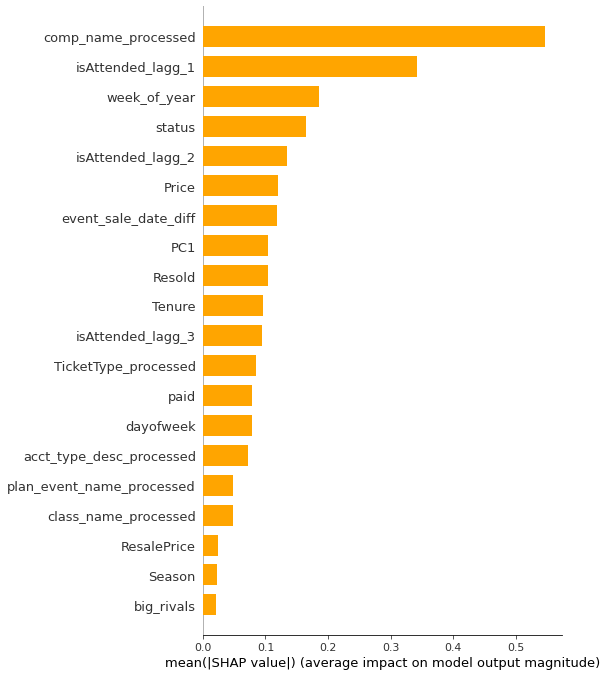

In [164]:
shap.summary_plot(shap_values, X_test.values, plot_type="bar", class_names= class_names, feature_names = X_test.columns,color='orange',color_bar_label='red',cmap='coolwarm')


KeyboardInterrupt: 

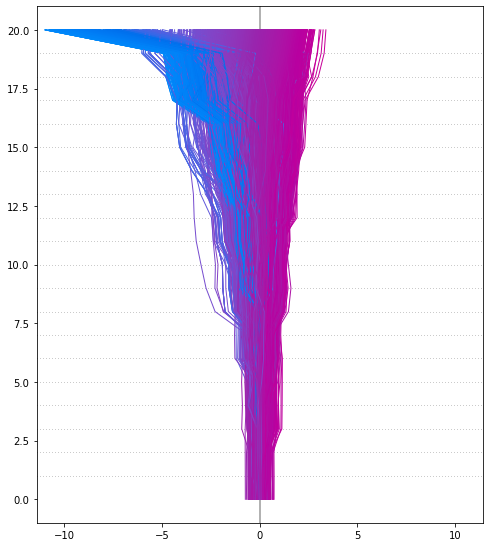

In [132]:
shap.plots.decision(0,shap_values,ignore_warnings=True)

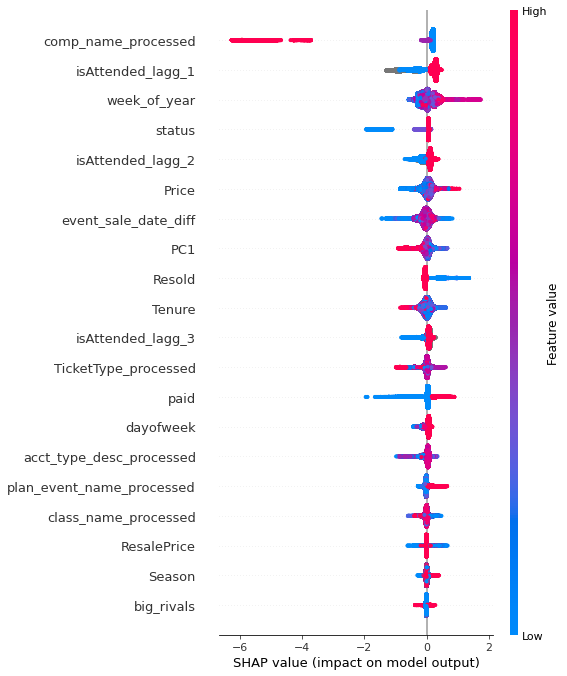

In [126]:
shap.summary_plot(shap_values, X_test.values, feature_names = X_test.columns)

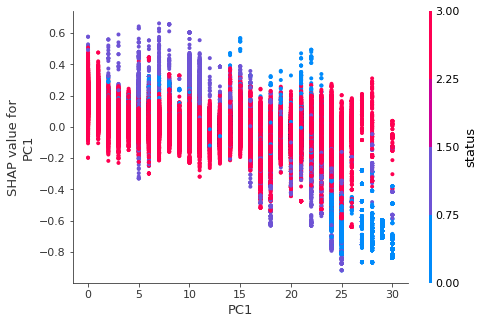

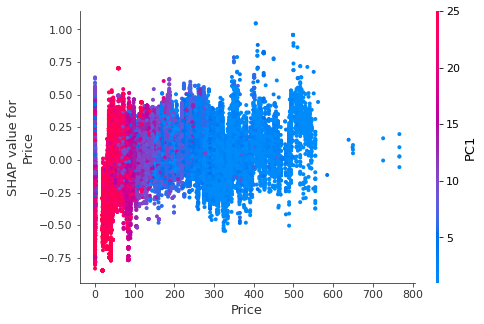

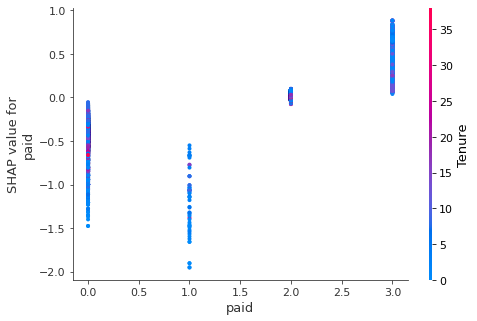

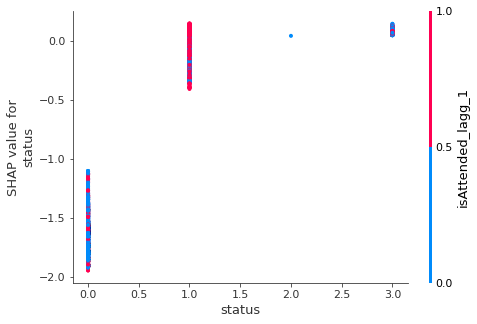

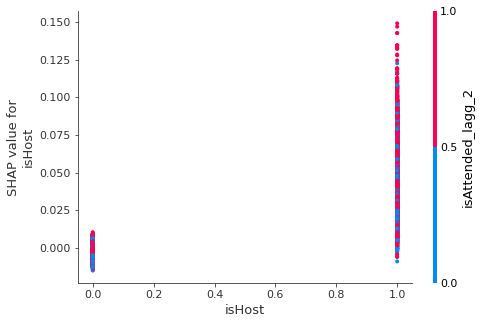

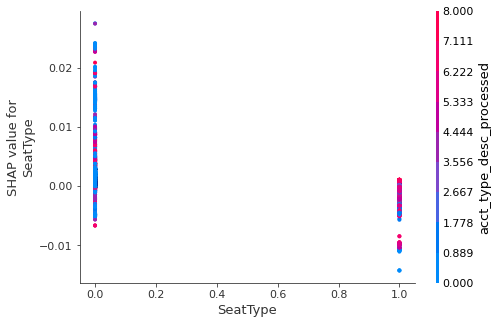

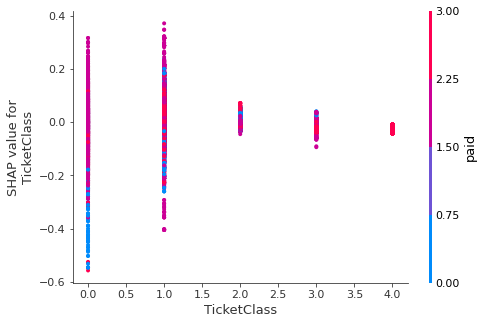

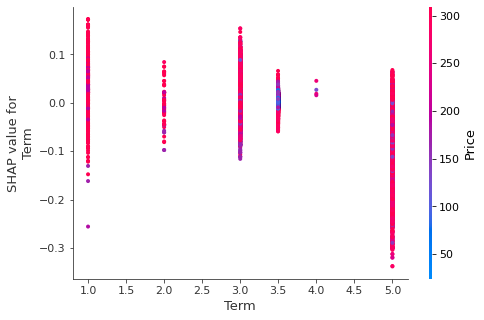

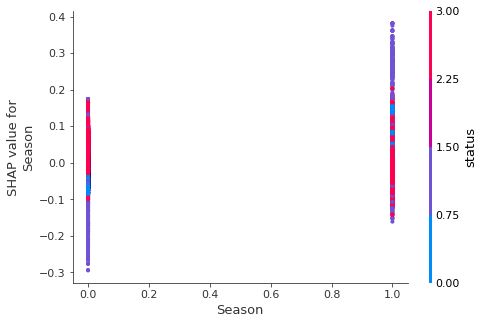

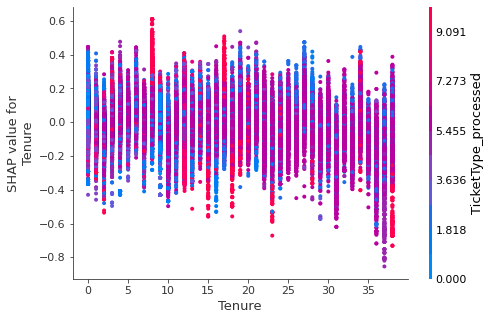

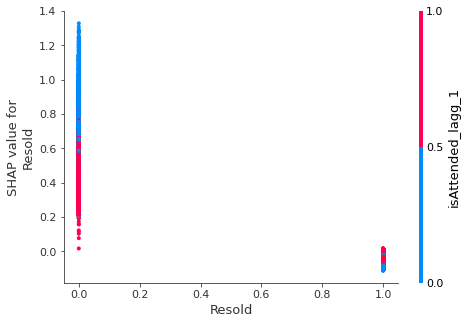

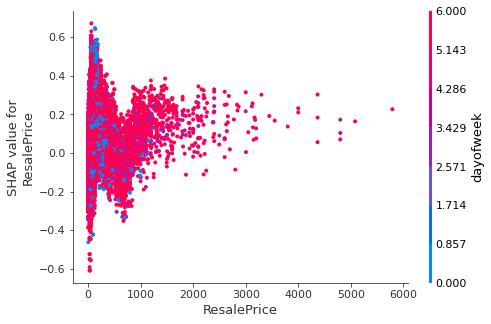

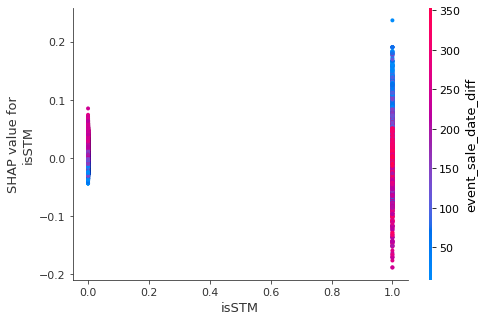

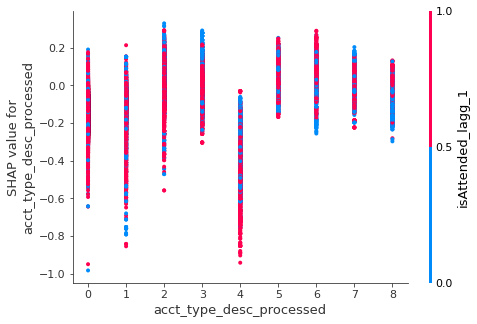

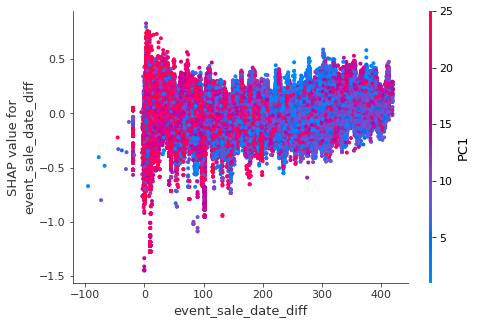

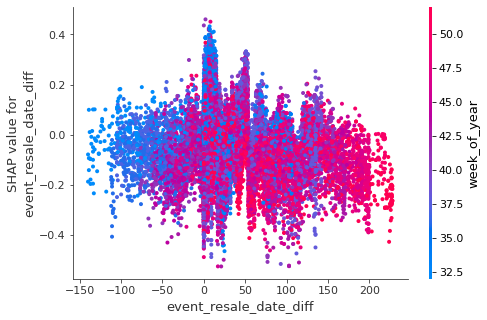

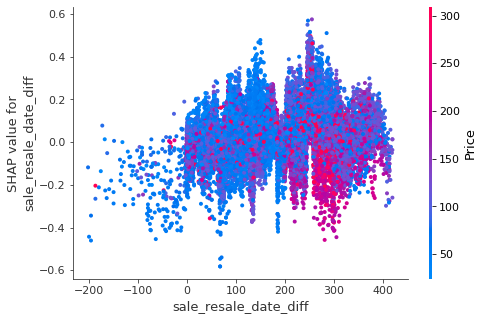

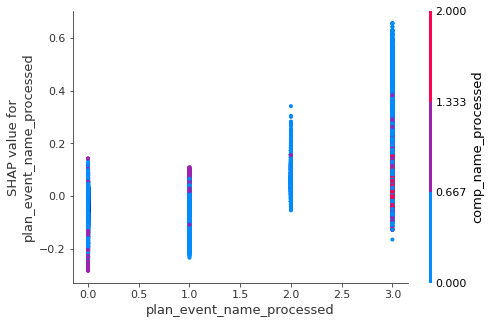

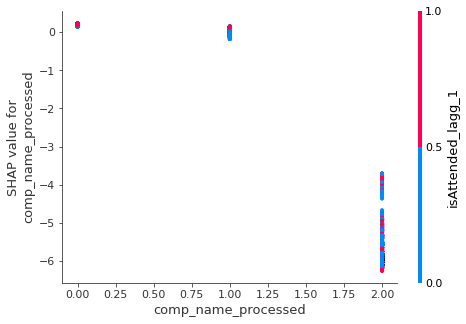

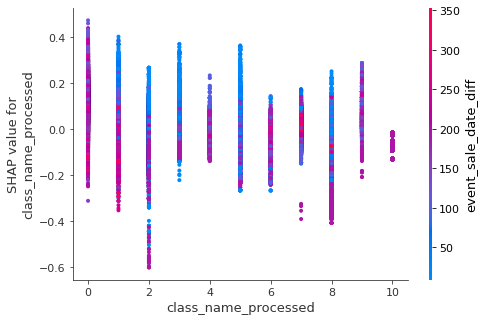

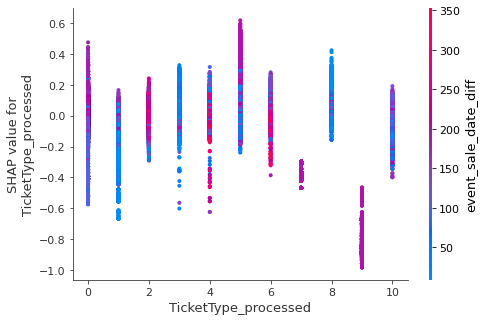

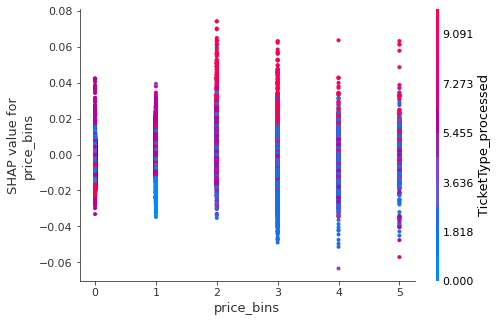

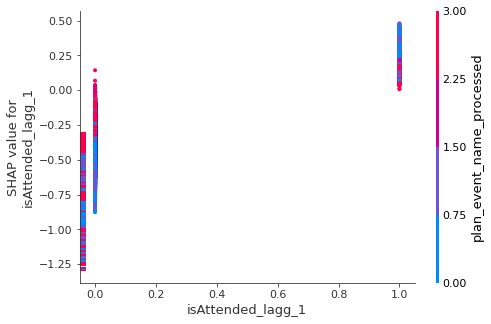

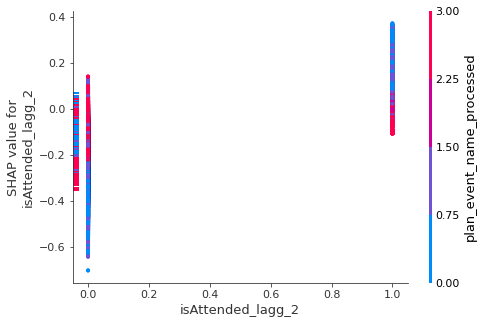

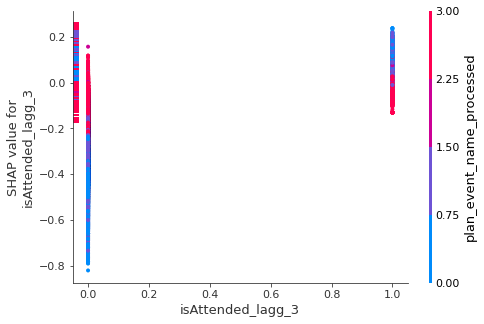

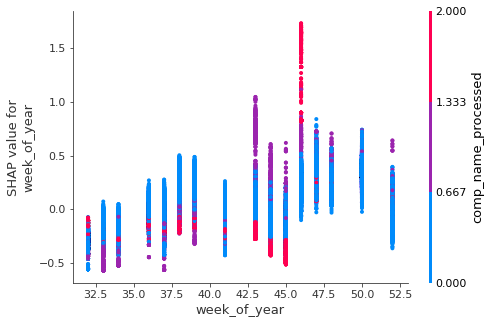

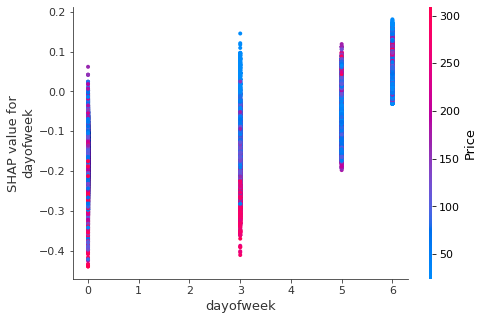

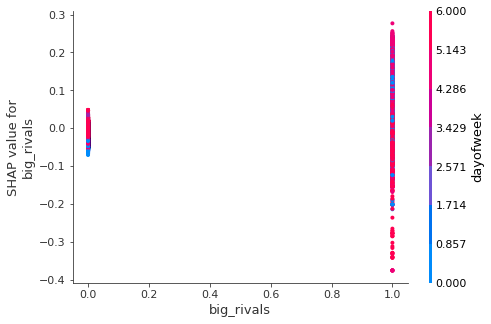

In [144]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values, X_test)

In [166]:
shap.force_plot(0,shap_values=shap_values,features=X_test.iloc[:1000,:])

shap.plots.force is slow for many thousands of rows, try subsampling your data.


IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [960]:
test_df.to_csv('submission_7.csv')

In [838]:
xgbe = XGBClassifier(
    n_estimators=2500,
    colsample_bytree=0.8,
    learning_rate=0.25,
    max_depth=8,
    n_jobs=-1,
    random_state=172,
    reg_alpha=20,
    reg_lambda=30
)


In [839]:
xgbf = XGBClassifier(
    n_estimators=2000,
    colsample_bytree=0.8,
    learning_rate=0.25,
    max_depth=8,
    n_jobs=-1,
    random_state=18,
    reg_alpha=20,
    reg_lambda=30
)


In [840]:
xgbg= XGBClassifier(
    n_estimators=2000,
    colsample_bytree=0.8,
    learning_rate=0.25,
    max_depth=8,
    n_jobs=-1,
    random_state=190,
    reg_alpha=20,
    reg_lambda=30
)


In [844]:
roc_auc_score(y_test,vc.predict_proba(X_test)[:,1])

0.8544130807751817

In [845]:
roc_auc_score(y_train,vc.predict_proba(X_train)[:,1])

0.8951856971482964

In [846]:
vc.score(X_test,y_test)

0.8683723295056648

In [847]:
vc.score(X_train,y_train)

0.8760816049764885

In [ ]:
test_df['isAttended']=.predict(test_df.drop('isAttended',axis=1))

In [54]:
from sklearn.metrics import roc_auc_score

In [472]:
auc_train = roc_auc_score(y_train, xgbc.predict_proba(X_train)[:,1])
auc_test = roc_auc_score(y_test, xgbc.predict_proba(X_test)[:,1])
accuracy_test=xgbc.score(X_test,y_test)


print(auc_train, auc_test,accuracy_test)

0.8922148092714526 0.8533089440217134 0.8647418906434818


In [480]:
auc_train = roc_auc_score(y_train, xgbd.predict_proba(X_train)[:,1])
auc_test = roc_auc_score(y_test, xgbd.predict_proba(X_test)[:,1])
accuracy_test=xgbd.score(X_test,y_test)


print(auc_train, auc_test,accuracy_test)

0.9111348047518448 0.8606858455575075 0.8684976213705395


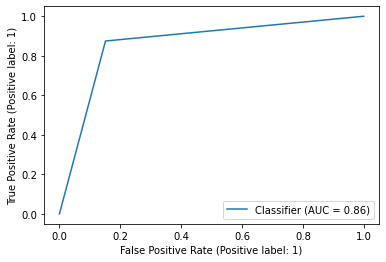

In [317]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(xgbd.predict(X_test),y_test,)

## Grid Search

In [676]:
from sklearn.model_selection import GridSearchCV

In [677]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01,0.1],
           'n_estimators': [100, 400],
         }

In [193]:
xgbc = XGBClassifier(n_estimators=1200,learning_rate=0.2,max_depth=8,colsample_bytree=0.7,random_state=99)

In [98]:
fit_params={"early_stopping_rounds":42, 
            "eval_metric" : "roc_auc", 
            "eval_set" : [[X_test,y_test]]}
clf = GridSearchCV(estimator=xgbc,
                   param_grid=params,
                   scoring=('roc_auc','recall'),refit=False,verbose=1)

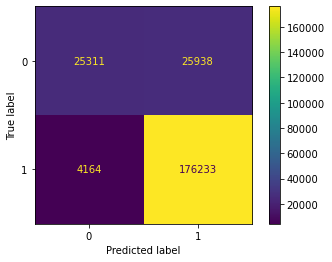

In [617]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = xgbd.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=xgbd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgbd.classes_)
disp.plot()
plt.show()

In [165]:
y_test.isAttended.value_counts()

1    179861
0     51785
Name: isAttended, dtype: int64

In [171]:
pred_data=pd.DataFrame(predictions,columns=['pred'],index=X_test.index)

In [174]:
final_result=pd.merge(X_test,pred_data,left_index=True,right_index=True)

In [177]:
pred_true_merge=pd.merge(final_result,y_test,left_index=True,right_index=True)

In [188]:
pred_true_merge[(pred_true_merge['isAttended']==0) & (pred_true_merge['pred']==1)].sale_resale_date_diff.unique()

array([ 258.,   nan,  202.,  301.,  182.,  199.,  180.,  157.,  103.,
        243.,  225.,  212.,  349.,  234.,   64.,  249.,  218.,  291.,
        272.,  148.,  227.,  126.,   33.,  118.,  155.,  137.,   84.,
         52.,  133.,   57.,  147.,   92.,  244.,  213.,   42.,   98.,
        257.,  255.,  121.,  114.,  233.,  214.,  203.,  314.,  196.,
         40.,  224.,  217.,  107.,  185.,  189.,  274.,  154.,  117.,
        219.,  -60.,  104.,  297.,  144.,  197.,   83.,   30.,  187.,
        163.,  106.,  198.,  142.,   60.,  295.,   79.,  207.,  283.,
        122.,    1.,  266.,  293.,  216.,  282.,  160.,  156.,  242.,
        231.,  264.,  325.,  195.,   93.,  263.,    6.,   81.,  310.,
        146.,  130.,   97.,  181.,  171.,  170.,  408.,   96.,  319.,
        105.,  391.,  132.,  221.,  143.,   43.,   90.,  128.,  158.,
        206.,  241.,  165.,  235.,  211.,  123.,  124.,  205.,   94.,
        346.,   44.,  190.,  159.,  178.,  337.,  292.,  136.,  309.,
          4.,  186.,

In [191]:
pred_true_merge

,event_name,PC1,Price,paid,status,isHost,SeatType,TicketClass,Term,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_desc_processed,event_sale_date_diff,event_resale_date_diff,sale_resale_date_diff,plan_event_name_processed,comp_name_processed,class_name_processed,TicketType_processed,pred,isAttended
362955,4,18,78.0,3,0,0,1,0,NaN,0,NaN,1,NaN,0.0,8,NaN,NaN,NaN,3,2,8,5,0,0
551337,7,14,132.0,2,3,0,1,2,NaN,0,2.0,1,NaN,0.0,6,241.0,NaN,NaN,0,0,7,6,1,1
394258,5,11,59.0,2,3,0,1,2,NaN,0,33.0,1,NaN,0.0,6,137.0,NaN,NaN,0,0,7,6,1,1
623477,8,23,59.0,3,0,0,1,1,NaN,0,NaN,1,NaN,0.0,8,NaN,NaN,NaN,3,2,5,5,0,0
500778,6,19,98.0,2,3,0,1,2,NaN,0,1.0,1,NaN,0.0,2,75.0,NaN,NaN,3,0,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161683,2,13,108.0,2,3,0,1,2,NaN,0,1.0,1,NaN,0.0,6,149.0,NaN,NaN,0,0,1,4,1,1
448101,5,19,38.0,2,3,0,1,2,NaN,0,7.0,1,NaN,0.0,6,123.0,NaN,NaN,0,0,0,6,1,1
309509,3,20,81.0,3,3,1,1,2,NaN,0,1.0,1,NaN,0.0,5,24.0,NaN,NaN,3,0,2,8,1,0
923220,12,11,120.0,2,3,0,1,2,NaN,1,18.0,1,NaN,1.0,6,324.0,NaN,NaN,1,0,7,6,1,1


In [92]:
train_df.Term.unique()

array([nan,  3.,  5.,  2.,  1.,  4.])

In [129]:
xgb.save_model("83.8_auc_test")

In [130]:
xgb.load_model('83.8_auc_test')

In [192]:
xgb.classes_

array([0, 1])

In [190]:
xgb.predict_proba(X_test),y_test

(array([[0.9968522 , 0.00314777],
        [0.07358962, 0.9264104 ],
        [0.45451725, 0.54548275],
        ...,
        [0.04001665, 0.95998335],
        [0.10099226, 0.89900774],
        [0.1576786 , 0.8423214 ]], dtype=float32),
         isAttended
 362955           0
 551337           1
 394258           1
 623477           0
 500778           1
 ...            ...
 161683           1
 448101           1
 309509           0
 923220           1
 138527           1
 
 [231646 rows x 1 columns])

In [212]:
pd.DataFrame(xgbc.feature_importances_,index=xgbc.feature_names_in_,columns=['imp']).sort_values(by='imp',ascending=False).index

Index(['comp_name_processed', 'status', 'isHost', 'paid', 'Resold', 'event_sale_date_diff', 'event_name', 'TicketType_processed', 'acct_type_desc_processed', 'Price', 'plan_event_name_processed', 'SeatType', 'Term', 'PC1', 'Season', 'isSTM', 'TicketClass', 'class_name_processed', 'Tenure', 'sale_resale_date_diff', 'ResalePrice', 'event_resale_date_diff'], dtype='object')

In [48]:
import catboost

In [663]:
from catboost import CatBoostClassifier

In [50]:
cb=CatBoostClassifier(iterations=1000,max_depth=10,learning_rate=0.05,rsm=0.8,eval_metric='AUC')

In [609]:
cb.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=20)

0:	test: 0.7947036	best: 0.7947036 (0)	total: 666ms	remaining: 16m 38s
1:	test: 0.8003493	best: 0.8003493 (1)	total: 1.26s	remaining: 15m 44s
2:	test: 0.7994002	best: 0.8003493 (1)	total: 1.69s	remaining: 14m 3s
3:	test: 0.8029099	best: 0.8029099 (3)	total: 2.25s	remaining: 14m 3s
4:	test: 0.8022205	best: 0.8029099 (3)	total: 2.87s	remaining: 14m 19s
5:	test: 0.8028545	best: 0.8029099 (3)	total: 3.46s	remaining: 14m 21s
6:	test: 0.8031040	best: 0.8031040 (6)	total: 4.03s	remaining: 14m 18s
7:	test: 0.8031698	best: 0.8031698 (7)	total: 4.64s	remaining: 14m 25s
8:	test: 0.8040850	best: 0.8040850 (8)	total: 5.23s	remaining: 14m 26s
9:	test: 0.8046570	best: 0.8046570 (9)	total: 5.83s	remaining: 14m 28s
10:	test: 0.8048358	best: 0.8048358 (10)	total: 6.36s	remaining: 14m 20s
11:	test: 0.8055091	best: 0.8055091 (11)	total: 7.02s	remaining: 14m 29s
12:	test: 0.8057762	best: 0.8057762 (12)	total: 7.56s	remaining: 14m 25s
13:	test: 0.8062729	best: 0.8062729 (13)	total: 8.23s	remaining: 14m 33s


113:	test: 0.8221842	best: 0.8221842 (113)	total: 1m 6s	remaining: 13m 30s
114:	test: 0.8222214	best: 0.8222214 (114)	total: 1m 7s	remaining: 13m 29s
115:	test: 0.8222683	best: 0.8222683 (115)	total: 1m 7s	remaining: 13m 28s
116:	test: 0.8223387	best: 0.8223387 (116)	total: 1m 8s	remaining: 13m 28s
117:	test: 0.8223708	best: 0.8223708 (117)	total: 1m 9s	remaining: 13m 28s
118:	test: 0.8224120	best: 0.8224120 (118)	total: 1m 9s	remaining: 13m 27s
119:	test: 0.8224597	best: 0.8224597 (119)	total: 1m 10s	remaining: 13m 25s
120:	test: 0.8225131	best: 0.8225131 (120)	total: 1m 10s	remaining: 13m 25s
121:	test: 0.8225517	best: 0.8225517 (121)	total: 1m 11s	remaining: 13m 23s
122:	test: 0.8226126	best: 0.8226126 (122)	total: 1m 11s	remaining: 13m 23s
123:	test: 0.8226546	best: 0.8226546 (123)	total: 1m 12s	remaining: 13m 22s
124:	test: 0.8227103	best: 0.8227103 (124)	total: 1m 12s	remaining: 13m 22s
125:	test: 0.8227600	best: 0.8227600 (125)	total: 1m 13s	remaining: 13m 21s
126:	test: 0.82279

222:	test: 0.8262178	best: 0.8262178 (222)	total: 2m 9s	remaining: 12m 20s
223:	test: 0.8262362	best: 0.8262362 (223)	total: 2m 9s	remaining: 12m 20s
224:	test: 0.8262618	best: 0.8262618 (224)	total: 2m 10s	remaining: 12m 19s
225:	test: 0.8262859	best: 0.8262859 (225)	total: 2m 11s	remaining: 12m 18s
226:	test: 0.8262998	best: 0.8262998 (226)	total: 2m 11s	remaining: 12m 18s
227:	test: 0.8263295	best: 0.8263295 (227)	total: 2m 12s	remaining: 12m 17s
228:	test: 0.8263416	best: 0.8263416 (228)	total: 2m 12s	remaining: 12m 17s
229:	test: 0.8263685	best: 0.8263685 (229)	total: 2m 13s	remaining: 12m 16s
230:	test: 0.8264081	best: 0.8264081 (230)	total: 2m 13s	remaining: 12m 15s
231:	test: 0.8264294	best: 0.8264294 (231)	total: 2m 14s	remaining: 12m 15s
232:	test: 0.8264407	best: 0.8264407 (232)	total: 2m 15s	remaining: 12m 14s
233:	test: 0.8264593	best: 0.8264593 (233)	total: 2m 15s	remaining: 12m 14s
234:	test: 0.8265002	best: 0.8265002 (234)	total: 2m 16s	remaining: 12m 13s
235:	test: 0.8

331:	test: 0.8289359	best: 0.8289359 (331)	total: 3m 11s	remaining: 11m 14s
332:	test: 0.8289626	best: 0.8289626 (332)	total: 3m 12s	remaining: 11m 13s
333:	test: 0.8289727	best: 0.8289727 (333)	total: 3m 12s	remaining: 11m 12s
334:	test: 0.8290007	best: 0.8290007 (334)	total: 3m 13s	remaining: 11m 12s
335:	test: 0.8290345	best: 0.8290345 (335)	total: 3m 13s	remaining: 11m 11s
336:	test: 0.8290760	best: 0.8290760 (336)	total: 3m 14s	remaining: 11m 11s
337:	test: 0.8290952	best: 0.8290952 (337)	total: 3m 15s	remaining: 11m 10s
338:	test: 0.8291125	best: 0.8291125 (338)	total: 3m 15s	remaining: 11m 10s
339:	test: 0.8291216	best: 0.8291216 (339)	total: 3m 16s	remaining: 11m 9s
340:	test: 0.8291420	best: 0.8291420 (340)	total: 3m 16s	remaining: 11m 8s
341:	test: 0.8291543	best: 0.8291543 (341)	total: 3m 17s	remaining: 11m 8s
342:	test: 0.8291840	best: 0.8291840 (342)	total: 3m 17s	remaining: 11m 7s
343:	test: 0.8292172	best: 0.8292172 (343)	total: 3m 18s	remaining: 11m 7s
344:	test: 0.8292

440:	test: 0.8309675	best: 0.8309675 (440)	total: 4m 13s	remaining: 10m 9s
441:	test: 0.8309913	best: 0.8309913 (441)	total: 4m 14s	remaining: 10m 8s
442:	test: 0.8310034	best: 0.8310034 (442)	total: 4m 14s	remaining: 10m 8s
443:	test: 0.8310423	best: 0.8310423 (443)	total: 4m 15s	remaining: 10m 7s
444:	test: 0.8310593	best: 0.8310593 (444)	total: 4m 15s	remaining: 10m 6s
445:	test: 0.8310721	best: 0.8310721 (445)	total: 4m 16s	remaining: 10m 6s
446:	test: 0.8310878	best: 0.8310878 (446)	total: 4m 17s	remaining: 10m 5s
447:	test: 0.8310941	best: 0.8310941 (447)	total: 4m 17s	remaining: 10m 5s
448:	test: 0.8311069	best: 0.8311069 (448)	total: 4m 18s	remaining: 10m 4s
449:	test: 0.8311205	best: 0.8311205 (449)	total: 4m 18s	remaining: 10m 4s
450:	test: 0.8311430	best: 0.8311430 (450)	total: 4m 19s	remaining: 10m 3s
451:	test: 0.8311509	best: 0.8311509 (451)	total: 4m 19s	remaining: 10m 2s
452:	test: 0.8311556	best: 0.8311556 (452)	total: 4m 20s	remaining: 10m 2s
453:	test: 0.8311738	best

550:	test: 0.8326989	best: 0.8326989 (550)	total: 5m 18s	remaining: 9m 8s
551:	test: 0.8327075	best: 0.8327075 (551)	total: 5m 19s	remaining: 9m 8s
552:	test: 0.8327433	best: 0.8327433 (552)	total: 5m 19s	remaining: 9m 7s
553:	test: 0.8327500	best: 0.8327500 (553)	total: 5m 20s	remaining: 9m 7s
554:	test: 0.8327528	best: 0.8327528 (554)	total: 5m 20s	remaining: 9m 6s
555:	test: 0.8327726	best: 0.8327726 (555)	total: 5m 21s	remaining: 9m 5s
556:	test: 0.8327807	best: 0.8327807 (556)	total: 5m 22s	remaining: 9m 5s
557:	test: 0.8328020	best: 0.8328020 (557)	total: 5m 22s	remaining: 9m 4s
558:	test: 0.8328114	best: 0.8328114 (558)	total: 5m 23s	remaining: 9m 4s
559:	test: 0.8328231	best: 0.8328231 (559)	total: 5m 23s	remaining: 9m 3s
560:	test: 0.8328327	best: 0.8328327 (560)	total: 5m 24s	remaining: 9m 2s
561:	test: 0.8328563	best: 0.8328563 (561)	total: 5m 24s	remaining: 9m 2s
562:	test: 0.8328593	best: 0.8328593 (562)	total: 5m 25s	remaining: 9m 1s
563:	test: 0.8328899	best: 0.8328899 (

660:	test: 0.8342019	best: 0.8342019 (660)	total: 6m 22s	remaining: 8m 4s
661:	test: 0.8342210	best: 0.8342210 (661)	total: 6m 22s	remaining: 8m 4s
662:	test: 0.8342411	best: 0.8342411 (662)	total: 6m 23s	remaining: 8m 3s
663:	test: 0.8342528	best: 0.8342528 (663)	total: 6m 23s	remaining: 8m 3s
664:	test: 0.8342524	best: 0.8342528 (663)	total: 6m 24s	remaining: 8m 2s
665:	test: 0.8342691	best: 0.8342691 (665)	total: 6m 24s	remaining: 8m 1s
666:	test: 0.8342685	best: 0.8342691 (665)	total: 6m 25s	remaining: 8m 1s
667:	test: 0.8342824	best: 0.8342824 (667)	total: 6m 25s	remaining: 8m
668:	test: 0.8343008	best: 0.8343008 (668)	total: 6m 26s	remaining: 7m 59s
669:	test: 0.8343009	best: 0.8343009 (669)	total: 6m 26s	remaining: 7m 59s
670:	test: 0.8343064	best: 0.8343064 (670)	total: 6m 27s	remaining: 7m 58s
671:	test: 0.8343085	best: 0.8343085 (671)	total: 6m 28s	remaining: 7m 58s
672:	test: 0.8343351	best: 0.8343351 (672)	total: 6m 28s	remaining: 7m 57s
673:	test: 0.8343547	best: 0.8343547

770:	test: 0.8354884	best: 0.8354884 (770)	total: 7m 24s	remaining: 7m
771:	test: 0.8354969	best: 0.8354969 (771)	total: 7m 24s	remaining: 6m 59s
772:	test: 0.8355131	best: 0.8355131 (772)	total: 7m 25s	remaining: 6m 58s
773:	test: 0.8355216	best: 0.8355216 (773)	total: 7m 26s	remaining: 6m 58s
774:	test: 0.8355387	best: 0.8355387 (774)	total: 7m 26s	remaining: 6m 57s
775:	test: 0.8355453	best: 0.8355453 (775)	total: 7m 27s	remaining: 6m 57s
776:	test: 0.8355547	best: 0.8355547 (776)	total: 7m 27s	remaining: 6m 56s
777:	test: 0.8355637	best: 0.8355637 (777)	total: 7m 28s	remaining: 6m 55s
778:	test: 0.8355729	best: 0.8355729 (778)	total: 7m 28s	remaining: 6m 55s
779:	test: 0.8355945	best: 0.8355945 (779)	total: 7m 29s	remaining: 6m 54s
780:	test: 0.8356004	best: 0.8356004 (780)	total: 7m 29s	remaining: 6m 54s
781:	test: 0.8356110	best: 0.8356110 (781)	total: 7m 30s	remaining: 6m 53s
782:	test: 0.8356319	best: 0.8356319 (782)	total: 7m 31s	remaining: 6m 53s
783:	test: 0.8356341	best: 0.

880:	test: 0.8365579	best: 0.8365579 (880)	total: 8m 27s	remaining: 5m 56s
881:	test: 0.8365671	best: 0.8365671 (881)	total: 8m 27s	remaining: 5m 55s
882:	test: 0.8365772	best: 0.8365772 (882)	total: 8m 28s	remaining: 5m 55s
883:	test: 0.8365859	best: 0.8365859 (883)	total: 8m 29s	remaining: 5m 54s
884:	test: 0.8365966	best: 0.8365966 (884)	total: 8m 29s	remaining: 5m 54s
885:	test: 0.8366017	best: 0.8366017 (885)	total: 8m 30s	remaining: 5m 53s
886:	test: 0.8366131	best: 0.8366131 (886)	total: 8m 30s	remaining: 5m 53s
887:	test: 0.8366241	best: 0.8366241 (887)	total: 8m 31s	remaining: 5m 52s
888:	test: 0.8366290	best: 0.8366290 (888)	total: 8m 32s	remaining: 5m 52s
889:	test: 0.8366370	best: 0.8366370 (889)	total: 8m 32s	remaining: 5m 51s
890:	test: 0.8366439	best: 0.8366439 (890)	total: 8m 33s	remaining: 5m 50s
891:	test: 0.8366615	best: 0.8366615 (891)	total: 8m 33s	remaining: 5m 50s
892:	test: 0.8366647	best: 0.8366647 (892)	total: 8m 34s	remaining: 5m 49s
893:	test: 0.8366623	best

990:	test: 0.8375737	best: 0.8375737 (990)	total: 9m 32s	remaining: 4m 54s
991:	test: 0.8375842	best: 0.8375842 (991)	total: 9m 33s	remaining: 4m 53s
992:	test: 0.8375920	best: 0.8375920 (992)	total: 9m 33s	remaining: 4m 53s
993:	test: 0.8375959	best: 0.8375959 (993)	total: 9m 34s	remaining: 4m 52s
994:	test: 0.8375992	best: 0.8375992 (994)	total: 9m 35s	remaining: 4m 51s
995:	test: 0.8376034	best: 0.8376034 (995)	total: 9m 35s	remaining: 4m 51s
996:	test: 0.8376123	best: 0.8376123 (996)	total: 9m 36s	remaining: 4m 50s
997:	test: 0.8376185	best: 0.8376185 (997)	total: 9m 36s	remaining: 4m 50s
998:	test: 0.8376218	best: 0.8376218 (998)	total: 9m 37s	remaining: 4m 49s
999:	test: 0.8376268	best: 0.8376268 (999)	total: 9m 37s	remaining: 4m 48s
1000:	test: 0.8376350	best: 0.8376350 (1000)	total: 9m 38s	remaining: 4m 48s
1001:	test: 0.8376343	best: 0.8376350 (1000)	total: 9m 39s	remaining: 4m 47s
1002:	test: 0.8376413	best: 0.8376413 (1002)	total: 9m 39s	remaining: 4m 47s
1003:	test: 0.83765

1097:	test: 0.8383340	best: 0.8383340 (1097)	total: 10m 33s	remaining: 3m 52s
1098:	test: 0.8383338	best: 0.8383340 (1097)	total: 10m 34s	remaining: 3m 51s
1099:	test: 0.8383398	best: 0.8383398 (1099)	total: 10m 34s	remaining: 3m 50s
1100:	test: 0.8383626	best: 0.8383626 (1100)	total: 10m 35s	remaining: 3m 50s
1101:	test: 0.8383720	best: 0.8383720 (1101)	total: 10m 36s	remaining: 3m 49s
1102:	test: 0.8383859	best: 0.8383859 (1102)	total: 10m 36s	remaining: 3m 49s
1103:	test: 0.8384034	best: 0.8384034 (1103)	total: 10m 37s	remaining: 3m 48s
1104:	test: 0.8384224	best: 0.8384224 (1104)	total: 10m 37s	remaining: 3m 48s
1105:	test: 0.8384325	best: 0.8384325 (1105)	total: 10m 38s	remaining: 3m 47s
1106:	test: 0.8384430	best: 0.8384430 (1106)	total: 10m 39s	remaining: 3m 46s
1107:	test: 0.8384527	best: 0.8384527 (1107)	total: 10m 39s	remaining: 3m 46s
1108:	test: 0.8384539	best: 0.8384539 (1108)	total: 10m 40s	remaining: 3m 45s
1109:	test: 0.8384553	best: 0.8384553 (1109)	total: 10m 40s	rema

1203:	test: 0.8391119	best: 0.8391119 (1203)	total: 11m 37s	remaining: 2m 51s
1204:	test: 0.8391171	best: 0.8391171 (1204)	total: 11m 38s	remaining: 2m 50s
1205:	test: 0.8391236	best: 0.8391236 (1205)	total: 11m 39s	remaining: 2m 50s
1206:	test: 0.8391277	best: 0.8391277 (1206)	total: 11m 39s	remaining: 2m 49s
1207:	test: 0.8391215	best: 0.8391277 (1206)	total: 11m 40s	remaining: 2m 49s
1208:	test: 0.8391299	best: 0.8391299 (1208)	total: 11m 41s	remaining: 2m 48s
1209:	test: 0.8391352	best: 0.8391352 (1209)	total: 11m 42s	remaining: 2m 48s
1210:	test: 0.8391463	best: 0.8391463 (1210)	total: 11m 42s	remaining: 2m 47s
1211:	test: 0.8391560	best: 0.8391560 (1211)	total: 11m 43s	remaining: 2m 47s
1212:	test: 0.8391677	best: 0.8391677 (1212)	total: 11m 44s	remaining: 2m 46s
1213:	test: 0.8391963	best: 0.8391963 (1213)	total: 11m 44s	remaining: 2m 46s
1214:	test: 0.8392121	best: 0.8392121 (1214)	total: 11m 45s	remaining: 2m 45s
1215:	test: 0.8392160	best: 0.8392160 (1215)	total: 11m 46s	rema

1309:	test: 0.8398676	best: 0.8398676 (1309)	total: 12m 40s	remaining: 1m 50s
1310:	test: 0.8398667	best: 0.8398676 (1309)	total: 12m 41s	remaining: 1m 49s
1311:	test: 0.8398754	best: 0.8398754 (1311)	total: 12m 41s	remaining: 1m 49s
1312:	test: 0.8398911	best: 0.8398911 (1312)	total: 12m 42s	remaining: 1m 48s
1313:	test: 0.8398916	best: 0.8398916 (1313)	total: 12m 42s	remaining: 1m 47s
1314:	test: 0.8399025	best: 0.8399025 (1314)	total: 12m 43s	remaining: 1m 47s
1315:	test: 0.8399063	best: 0.8399063 (1315)	total: 12m 43s	remaining: 1m 46s
1316:	test: 0.8399079	best: 0.8399079 (1316)	total: 12m 44s	remaining: 1m 46s
1317:	test: 0.8399260	best: 0.8399260 (1317)	total: 12m 44s	remaining: 1m 45s
1318:	test: 0.8399320	best: 0.8399320 (1318)	total: 12m 45s	remaining: 1m 45s
1319:	test: 0.8399413	best: 0.8399413 (1319)	total: 12m 46s	remaining: 1m 44s
1320:	test: 0.8399530	best: 0.8399530 (1320)	total: 12m 46s	remaining: 1m 43s
1321:	test: 0.8399565	best: 0.8399565 (1321)	total: 12m 47s	rema

1415:	test: 0.8406425	best: 0.8406425 (1415)	total: 13m 41s	remaining: 48.7s
1416:	test: 0.8406439	best: 0.8406439 (1416)	total: 13m 41s	remaining: 48.1s
1417:	test: 0.8406506	best: 0.8406506 (1417)	total: 13m 42s	remaining: 47.5s
1418:	test: 0.8406512	best: 0.8406512 (1418)	total: 13m 42s	remaining: 47s
1419:	test: 0.8406581	best: 0.8406581 (1419)	total: 13m 43s	remaining: 46.4s
1420:	test: 0.8406752	best: 0.8406752 (1420)	total: 13m 43s	remaining: 45.8s
1421:	test: 0.8406792	best: 0.8406792 (1421)	total: 13m 44s	remaining: 45.2s
1422:	test: 0.8406807	best: 0.8406807 (1422)	total: 13m 45s	remaining: 44.6s
1423:	test: 0.8406807	best: 0.8406807 (1422)	total: 13m 45s	remaining: 44.1s
1424:	test: 0.8406790	best: 0.8406807 (1422)	total: 13m 46s	remaining: 43.5s
1425:	test: 0.8406944	best: 0.8406944 (1425)	total: 13m 46s	remaining: 42.9s
1426:	test: 0.8406979	best: 0.8406979 (1426)	total: 13m 47s	remaining: 42.3s
1427:	test: 0.8407118	best: 0.8407118 (1427)	total: 13m 47s	remaining: 41.7s
1

In [534]:
roc_auc_score(y_test,cb.predict_proba(X_test)[:,1])

0.8496518025258859

In [535]:
roc_auc_score(y_train,cb.predict_proba(X_train)[:,1])

0.8844250468384505

In [537]:
cb.score(X_test,y_test)

0.8636842423352875

In [538]:
cb.score(X_train,y_train)

0.873412175069233

In [198]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cbpredictions = cb.predict(X_test)
cm = confusion_matrix(y_test,cbpredictions, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.show()

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [540]:
from sklearn.metrics import precision_score

In [541]:
precision_score(y_test,cbpredictions)

0.8626944525975931

In [542]:
recall_score(y_test,cbpredictions)

0.9804904898782949

In [220]:
from sklearn.ensemble import VotingClassifier

In [1148]:
vc=VotingClassifier([('xgbost',xgbd), ('catboost',cb),('lightgbm',lgbm)], voting='soft',weights=[2,1,1])

In [1149]:
vc.fit(X_train,y_train)

C:\Users\nilch\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nilch\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	total: 513ms	remaining: 8m 32s
1:	total: 1.01s	remaining: 8m 23s
2:	total: 1.48s	remaining: 8m 10s
3:	total: 1.93s	remaining: 8m
4:	total: 2.39s	remaining: 7m 56s
5:	total: 2.82s	remaining: 7m 47s
6:	total: 3.27s	remaining: 7m 44s
7:	total: 3.72s	remaining: 7m 41s
8:	total: 4.14s	remaining: 7m 35s
9:	total: 4.57s	remaining: 7m 32s
10:	total: 4.97s	remaining: 7m 26s
11:	total: 5.41s	remaining: 7m 25s
12:	total: 5.85s	remaining: 7m 24s
13:	total: 6.35s	remaining: 7m 27s
14:	total: 6.71s	remaining: 7m 20s
15:	total: 7.11s	remaining: 7m 17s
16:	total: 7.54s	remaining: 7m 16s
17:	total: 7.98s	remaining: 7m 15s
18:	total: 8.42s	remaining: 7m 14s
19:	total: 8.99s	remaining: 7m 20s
20:	total: 9.52s	remaining: 7m 23s
21:	total: 9.96s	remaining: 7m 22s
22:	total: 10.4s	remaining: 7m 22s
23:	total: 10.8s	remaining: 7m 21s
24:	total: 11.3s	remaining: 7m 19s
25:	total: 11.7s	remaining: 7m 19s
26:	total: 12.2s	remaining: 7m 18s
27:	total: 12.6s	remaining: 7m 17s
28:	total: 13s	remaining: 7m 15s
2

231:	total: 1m 43s	remaining: 5m 43s
232:	total: 1m 44s	remaining: 5m 43s
233:	total: 1m 44s	remaining: 5m 42s
234:	total: 1m 45s	remaining: 5m 42s
235:	total: 1m 45s	remaining: 5m 42s
236:	total: 1m 46s	remaining: 5m 41s
237:	total: 1m 46s	remaining: 5m 41s
238:	total: 1m 47s	remaining: 5m 40s
239:	total: 1m 47s	remaining: 5m 40s
240:	total: 1m 47s	remaining: 5m 40s
241:	total: 1m 48s	remaining: 5m 39s
242:	total: 1m 48s	remaining: 5m 38s
243:	total: 1m 49s	remaining: 5m 38s
244:	total: 1m 49s	remaining: 5m 38s
245:	total: 1m 50s	remaining: 5m 37s
246:	total: 1m 50s	remaining: 5m 37s
247:	total: 1m 51s	remaining: 5m 36s
248:	total: 1m 51s	remaining: 5m 36s
249:	total: 1m 51s	remaining: 5m 35s
250:	total: 1m 52s	remaining: 5m 35s
251:	total: 1m 52s	remaining: 5m 34s
252:	total: 1m 53s	remaining: 5m 34s
253:	total: 1m 53s	remaining: 5m 33s
254:	total: 1m 54s	remaining: 5m 33s
255:	total: 1m 54s	remaining: 5m 32s
256:	total: 1m 54s	remaining: 5m 32s
257:	total: 1m 55s	remaining: 5m 31s
2

456:	total: 3m 22s	remaining: 4m
457:	total: 3m 22s	remaining: 4m
458:	total: 3m 23s	remaining: 3m 59s
459:	total: 3m 23s	remaining: 3m 59s
460:	total: 3m 24s	remaining: 3m 58s
461:	total: 3m 24s	remaining: 3m 58s
462:	total: 3m 25s	remaining: 3m 57s
463:	total: 3m 25s	remaining: 3m 57s
464:	total: 3m 26s	remaining: 3m 57s
465:	total: 3m 26s	remaining: 3m 56s
466:	total: 3m 26s	remaining: 3m 56s
467:	total: 3m 27s	remaining: 3m 55s
468:	total: 3m 27s	remaining: 3m 55s
469:	total: 3m 28s	remaining: 3m 54s
470:	total: 3m 28s	remaining: 3m 54s
471:	total: 3m 29s	remaining: 3m 53s
472:	total: 3m 29s	remaining: 3m 53s
473:	total: 3m 29s	remaining: 3m 52s
474:	total: 3m 30s	remaining: 3m 52s
475:	total: 3m 30s	remaining: 3m 52s
476:	total: 3m 31s	remaining: 3m 51s
477:	total: 3m 31s	remaining: 3m 51s
478:	total: 3m 32s	remaining: 3m 50s
479:	total: 3m 32s	remaining: 3m 50s
480:	total: 3m 32s	remaining: 3m 49s
481:	total: 3m 33s	remaining: 3m 49s
482:	total: 3m 33s	remaining: 3m 48s
483:	tota

680:	total: 5m 1s	remaining: 2m 21s
681:	total: 5m 1s	remaining: 2m 20s
682:	total: 5m 2s	remaining: 2m 20s
683:	total: 5m 2s	remaining: 2m 19s
684:	total: 5m 3s	remaining: 2m 19s
685:	total: 5m 3s	remaining: 2m 18s
686:	total: 5m 3s	remaining: 2m 18s
687:	total: 5m 4s	remaining: 2m 18s
688:	total: 5m 4s	remaining: 2m 17s
689:	total: 5m 5s	remaining: 2m 17s
690:	total: 5m 5s	remaining: 2m 16s
691:	total: 5m 6s	remaining: 2m 16s
692:	total: 5m 6s	remaining: 2m 15s
693:	total: 5m 6s	remaining: 2m 15s
694:	total: 5m 7s	remaining: 2m 14s
695:	total: 5m 7s	remaining: 2m 14s
696:	total: 5m 8s	remaining: 2m 14s
697:	total: 5m 8s	remaining: 2m 13s
698:	total: 5m 9s	remaining: 2m 13s
699:	total: 5m 9s	remaining: 2m 12s
700:	total: 5m 10s	remaining: 2m 12s
701:	total: 5m 10s	remaining: 2m 11s
702:	total: 5m 10s	remaining: 2m 11s
703:	total: 5m 11s	remaining: 2m 10s
704:	total: 5m 11s	remaining: 2m 10s
705:	total: 5m 12s	remaining: 2m 10s
706:	total: 5m 12s	remaining: 2m 9s
707:	total: 5m 13s	rem

906:	total: 6m 46s	remaining: 41.7s
907:	total: 6m 46s	remaining: 41.2s
908:	total: 6m 47s	remaining: 40.8s
909:	total: 6m 47s	remaining: 40.3s
910:	total: 6m 48s	remaining: 39.9s
911:	total: 6m 48s	remaining: 39.4s
912:	total: 6m 48s	remaining: 39s
913:	total: 6m 49s	remaining: 38.5s
914:	total: 6m 49s	remaining: 38.1s
915:	total: 6m 50s	remaining: 37.6s
916:	total: 6m 50s	remaining: 37.2s
917:	total: 6m 51s	remaining: 36.7s
918:	total: 6m 51s	remaining: 36.3s
919:	total: 6m 51s	remaining: 35.8s
920:	total: 6m 52s	remaining: 35.4s
921:	total: 6m 52s	remaining: 34.9s
922:	total: 6m 53s	remaining: 34.5s
923:	total: 6m 53s	remaining: 34s
924:	total: 6m 54s	remaining: 33.6s
925:	total: 6m 54s	remaining: 33.1s
926:	total: 6m 54s	remaining: 32.7s
927:	total: 6m 55s	remaining: 32.2s
928:	total: 6m 55s	remaining: 31.8s
929:	total: 6m 56s	remaining: 31.3s
930:	total: 6m 56s	remaining: 30.9s
931:	total: 6m 57s	remaining: 30.4s
932:	total: 6m 57s	remaining: 30s
933:	total: 6m 57s	remaining: 29.5

VotingClassifier(estimators=[('xgbost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.2, max_bin=256,
                                            m...
                                            monotone_constraints='()',
                                            

In [1150]:
vc.score(X_test,y_test)

0.8654512140136799

In [1151]:
vc.score(X_train,y_train)

0.8719120691216389

In [1152]:
f1_score(y_test,vcpredictions)

0.9184413662754572

In [1153]:
roc_auc_score(y_test,vc.predict_proba(X_test)[:,1])

0.8527964505749552

In [1154]:
roc_auc_score(y_train,vc.predict_proba(X_train)[:,1])

0.8861015841740378

In [148]:
predictions = xgbd.predict(X_test)
predicted_proba = xgbd.predict_proba(X_test)

In [149]:
print("Accuracy Score Before Thresholding: {}".format(accuracy_score(y_test, predictions)))
print("Precision Score Before Thresholding: {}".format(precision_score(y_test, predictions)))
print("Recall Score Before Thresholding: {}".format(recall_score(y_test, predictions)))
print("F1 Score Before Thresholding: {}".format(f1_score(y_test, predictions)))
print("ROC AUC Score: {}".format(roc_auc_score(y_test, predicted_proba[:, -1])))

Accuracy Score Before Thresholding: 0.8608512965148071
Precision Score Before Thresholding: 0.8616377812527148
Recall Score Before Thresholding: 0.9782579213413882
F1 Score Before Thresholding: 0.9162519197681267
ROC AUC Score: 0.8394111918212576


In [146]:
from sklearn.metrics import roc_curve,accuracy_score,precision_score,recall_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


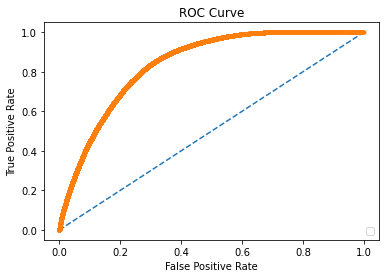

In [150]:
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, predicted_proba[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [1099]:
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >=0.52 else 0 for i in predicted_proba[:, -1]]

In [1100]:
optimal_proba_cutoff

0.7914065774858813

In [1101]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, predictions), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, predictions), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, predictions), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, predictions), f1_score(y_test, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.8646357958960486, 0.8651106570351397
Precision Score Before and After Thresholding: 0.8645219558109042, 0.8674481564294796
Recall Score Before and After Thresholding: 0.9795339662187154, 0.9757428183947725
F1 Score Before and After Thresholding: 0.9184413662754572, 0.9184141204321539


In [1139]:
test_df['isAttended']=vc.predict(test_df.drop('isAttended',axis=1))

C:\Users\nilch\AppData\Local\Temp\ipykernel_12292\911305147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['isAttended']=vc.predict(test_df.drop('isAttended',axis=1))


In [1144]:
test_df.isAttended.value_counts()[0]/test_df.isAttended.value_counts().sum()

0.07273405445729206

In [1146]:
test_df['isAttended'] = test_df['isAttended'].replace({1:'Yes',0:'No'})

C:\Users\nilch\AppData\Local\Temp\ipykernel_12292\1111838692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['isAttended'] = test_df['isAttended'].replace({1:'Yes',0:'No'})


In [1147]:
test_df.to_csv('submission10.csv')

C:\Users\nilch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isAttended', ylabel='count'>

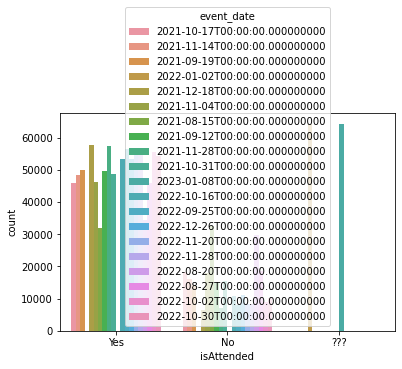

In [1060]:
sns.countplot(df['isAttended'],hue=df['event_date'])

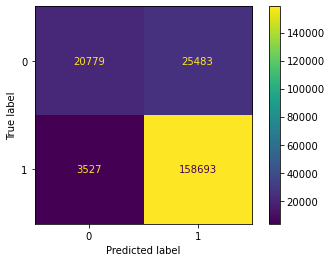

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#vcpredictions = vc.predict(X_test)
cm = confusion_matrix(y_test,predictions,labels=xgbd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgbd.classes_)
disp.plot()
plt.show()

In [328]:
confusion_matrix(y_test,vcpredictions,labels=vc.classes_)

NameError: name 'vc' is not defined

In [243]:
pip install lightgbm

In [320]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [1105]:
lgbm=LGBMClassifier(n_estimators=8000,max_depth=8,learning_rate=0.27,reg_lambda=40,reg_alpha=10)

In [1106]:
lgbm.fit(X_train,y_train)

C:\Users\nilch\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nilch\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(learning_rate=0.27, max_depth=8, n_estimators=8000, reg_alpha=10,
               reg_lambda=40)

In [1111]:
lgbm.score(X_test,y_test)

0.8696674053395497

In [1112]:
roc_auc_score(y_test,lgbm.predict_proba(X_test)[:,1])

0.8604879365377306

In [1113]:
roc_auc_score(y_train,lgbm.predict_proba(X_train)[:,1])

0.9096145302397006

In [1114]:
f1_score(y_test,lgbm.predict(X_test))

0.920881450293215

In [1115]:
test_df['isAttended']=lgbm.predict(test_df.drop('isAttended',axis=1))
test_df.isAttended.value_counts()

C:\Users\nilch\AppData\Local\Temp\ipykernel_12292\2182840233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['isAttended']=lgbm.predict(test_df.drop('isAttended',axis=1))


1    118249
0     10439
Name: isAttended, dtype: int64

In [294]:
confusion_matrix(y_test,lgbmpredictions,labels=lgbm.classes_)

array([[ 21912,  29873],
       [  2811, 177050]], dtype=int64)

In [ ]:
mlp.score(X_train,y_train)

In [337]:
mlp.score(X_test,y_test)

0.8488512644293448

In [338]:
roc_auc_score(y_test,mlp.predict_proba(X_test)[:,1])

0.7886383452954895

In [339]:
roc_auc_score(y_train,mlp.predict_proba(X_train)[:,1])

0.788962398094751

In [340]:
from sklearn.neighbors import KNeighborsClassifier

In [341]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

C:\Users\nilch\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [348]:
from sklearn.tree import DecisionTreeClassifier
dt

DecisionTreeClassifier(max_depth=8, max_features=10)

In [349]:
dt.score(X_test,y_test)

0.8446465727877882

In [350]:
dt.score(X_train,y_train)

0.8461021258776881

In [351]:
roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])

0.7807531015643383

In [375]:
X_train.shape

(1442168, 22)

In [359]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1, ...)

In [360]:
xgb.score(X_test,y_test)

0.8367897567840584

In [331]:
from xgboost import XGBRFClassifier
rf=XGBRFClassifier(n_estimators=2000,max_depth=10,max_features="sqrt",)
rf.fit(X_train,y_train)

[17:21:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
                max_features='sqrt', max_leaves=0, min_child_weight=1,
                missing=nan, monotone_constraints='()', n_estimators=2000,
                n_jobs=0, num_parallel_tree=2000, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', ...)

In [332]:
roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])

0.8158419512877146

In [333]:
roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])

0.8172772939959858

In [334]:
rf.score(X_test,y_test)

0.855042641570975

In [335]:
rf.score(X_train,y_train)

0.8540167581648146

In [1145]:
proba = np.stack([xgbd.predict_proba(X_test)[:, 1],
                  lgbm.predict_proba(X_test)[:, 1],
                  rf.predict_proba(X_test)[:, 1]]).T

In [337]:
proba

array([[0.93393832, 0.91680006, 0.83085114],
       [0.7394622 , 0.75212836, 0.75538558],
       [0.95818055, 0.94570548, 0.84078622],
       ...,
       [0.92750084, 0.95360383, 0.85379076],
       [0.96955651, 0.95672717, 0.84144533],
       [0.960262  , 0.93571313, 0.80664366]])

In [338]:
for i, model in enumerate(['XGB', 'LGBM ', 'RF']):
    ras = roc_auc_score(y_true=y_test, y_score=proba[:, i])
    print(f"ROC-AUC for model {model} is: {ras:0.5f}")

ROC-AUC for model XGB is: 0.86145
ROC-AUC for model LGBM  is: 0.85335
ROC-AUC for model RF is: 0.81584


In [339]:
arithmetic = proba.mean(axis=1)
ras = roc_auc_score(y_true=y_test, y_score=arithmetic)
print(f"Mean averaging ROC-AUC is: {ras:0.5f}")

Mean averaging ROC-AUC is: 0.85755


In [340]:
geometric = proba.prod(axis=1)**(1/3)
ras = roc_auc_score(y_true=y_test, y_score=geometric)
print(f"Geometric averaging ROC-AUC is: {ras:0.5f}")

Geometric averaging ROC-AUC is: 0.85754


In [341]:
cormat = np.corrcoef(proba.T)
np.fill_diagonal(cormat, 0.0)
W = 1 / np.mean(cormat, axis=1)
W = W / sum(W) # normalizing to sum==1.0
weighted = proba.dot(W)
ras = roc_auc_score(y_true=y_test, y_score=weighted)
print(f"Weighted averaging ROC-AUC is: {ras:0.5f}")

Weighted averaging ROC-AUC is: 0.85750


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
scores = list()

for k, (train_index, test_index) in enumerate(kf.split(X_train)):
    xgbc.fit(X_train[train_index, :], y_train[train_index])
    lgbm.fit(X_train[train_index, :], y_train[train_index])
    .fit(X_train[train_index, :], y_train[train_index])
    
    proba = np.stack([model_1.predict_proba(X_train[test_index, :])[:, 1],
                      model_2.predict_proba(X_train[test_index, :])[:, 1],
                      model_3.predict_proba(X_train[test_index, :])[:, 1]]).T
    
    arithmetic = proba.mean(axis=1)
    ras = roc_auc_score(y_true=y_train[test_index], y_score=arithmetic)
    scores.append(ras)
    print(f"FOLD {k} Mean averaging ROC-AUC is: {ras:0.5f}")